In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('forth_trace.csv')
X = df.drop(columns=['class'])
y = df['class']

# balanced_accuracy = (recall + specificity) / 2
metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

## MLP

In [3]:
for i in range(1,11):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    result = cross_validate(mpl, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: 500

Hidden Layers = 50:
	f1:
		mean = 57.47%;
		std = 0.05;
	balanced accuracy:
		mean = 40.57%;
		std = 0.05;
	accuracy:
		mean = 57.43%;
		std = 0.05;
Hidden Layers = 100:
	f1:
		mean = 58.52%;
		std = 0.04;
	balanced accuracy:
		mean = 40.98%;
		std = 0.05;
	accuracy:
		mean = 58.58%;
		std = 0.04;
Hidden Layers = 150:
	f1:
		mean = 59.48%;
		std = 0.04;
	balanced accuracy:
		mean = 45.13%;
		std = 0.06;
	accuracy:
		mean = 59.59%;
		std = 0.04;
Hidden Layers = 200:
	f1:
		mean = 60.08%;
		std = 0.04;
	balanced accuracy:
		mean = 43.99%;
		std = 0.05;
	accuracy:
		mean = 60.31%;
		std = 0.04;
Hidden Layers = 250:
	f1:
		mean = 59.18%;
		std = 0.05;
	balanced accuracy:
		mean = 44.00%;
		std = 0.05;
	accuracy:
		mean = 59.42%;
		std = 0.05;
Hidden Layers = 300:
	f1:
		mean = 59.55%;
		std = 0.05;
	balanced accuracy:
		mean = 44.18%;
		std = 0.06;
	accuracy:
		mean = 59.88%;
		std = 0.05;
Hidden Layers = 350:
	f1:
		mean = 60.01%;
		std = 0.04;
	balanced accuracy:
		mean = 43.81%;
		std =

## MLP Report

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(500,),
                    random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.91      0.96      0.93      1224
           2       0.95      0.96      0.96       657
           3       0.93      0.94      0.94       661
           4       0.74      0.75      0.75      1099
           5       0.76      0.76      0.76      1101
           6       0.74      0.82      0.78       699
           7       0.55      0.46      0.50       353
           8       0.29      0.27      0.28        49
           9       0.21      0.16      0.18        44
          10       0.25      0.19      0.21        48
          11       0.33      0.32      0.32        44
          12       0.53      0.27      0.36        30
          13       0.73      0.45      0.56        60
          14       0.93      0.47      0.62        30
          15       0.33      0.33      0.33        15
          16       0.14      0.07      0.09        15

    accuracy                           0.80      6129
   macro avg       0.58   

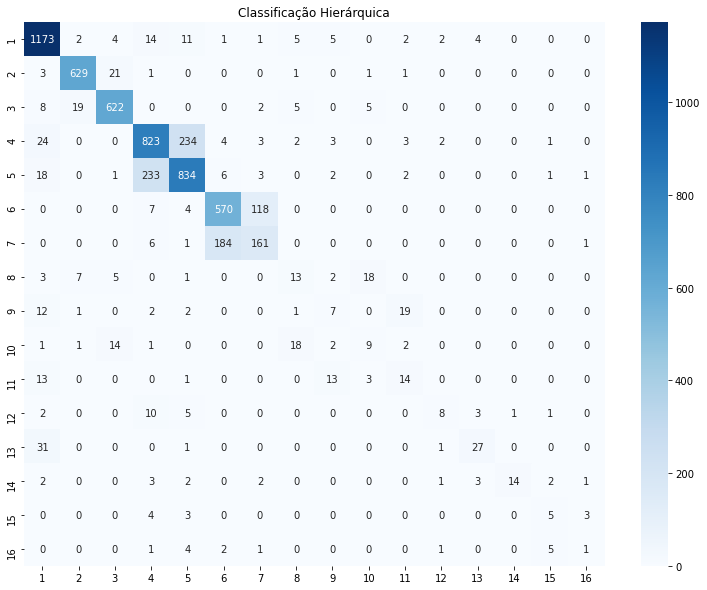

In [6]:
cf_matrix = confusion_matrix(y_test, y_pred)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Hierárquica')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)
